# Health Data Exploration

## Table of Contents

   [I. Data Gathering](#one) <br>
   
   [II. Data Assessment](#two) <br>
   
   [III. Data Cleaning](#three) <br>
   
   [V. Exploratory Data Analysis and Data Visualization](#four) <br>
   
   [V.Model Predictions and Accuracy Evaluation](#five) <br>
   
### Pleminary Wrangling
This document explores a data set containing 10000 Patients with 15 variables on each patient's health, such as Blood Type, Medical Condition, Date of Admission and many others. The goal of this project is to gain insight into our data in order to carry out informed decision making. Alongside, various models will be tested, with their accuracies compared in order to be able to predict a patient's test result based on parameters like Age, Gender, Blood Type, Medical Condition, Billing Amount, Admission Type. Such a model will enable quicker decision making in hospitals and allow for time and cost management <br>


#### Author : Owan Ayuk Daisy A.

## <a id="one" >Data Gathering</a>

In [230]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## %matplotlib inline


In [231]:
# load in the dataset into a pandas dataframe, print statistics
Health = pd.read_csv('healthcare_dataset.csv')

## <a id="two">Data Assessment</a>

### a) Visual Assessment

In [232]:
# high-level overview of data shape and composition
print(Health.shape)
print(Health.dtypes)

(10000, 15)
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [233]:
Health.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


###  Tidiness issues

We begin by addressing tidiness issues. These issues pertain to the structure of data. These structural problems generally prevent easy analysis. Upon visual assessment of our data we could observe it is tidy enough for further analysis and following the norms of tidiness, that is:
- Each variable is a column; each column is a variable. 
- Each observation is a row; each row is an observation. 
- Each value is a cell; each cell is a single value.

### b) Programmatic Assessment

- Crosschecking for incorrect/inconsistent data types/formats

In [234]:
Health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

Upon marching each variable to its content/datatype stored, we can observe that the Discharge and Admission Date variables have  incorrect datatype and will require cleaning

- Crosschecking for duplicate enteries/records

In [235]:
Health.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [236]:
sum(Health.duplicated())

0

No duplicate enteries as well....our data is free of duplicate records for a paticular patient

- crosschecking for null values/enteries

From our result after running Health.info(), we can also observe the absence of null enteries

In [237]:
#crosschecking statistical information related to our data for data inconsistency and inaccuracy
Health.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


No abnormalities observed as pertaining to the data

### Addressing Quality Issues
 In this phase, we proceed to address data quality issues. Essentially, data quality relates to its accuracy, completeness, consistency, and validity. In our analysis, we aim to address issues such as : Duplicate data,
Inaccurate data,
Inconsistent formats,
Incomplete data,
Hidden data,
Data downtime,
Human error,
Irrelevant data,
Outdated data,
Missing values,
Unstructured data,
Poor data accessibility
<br>

Upon carrying out our programmatic analysis, we observed the date fields to not have a correct data type. Saving a date related column with an object data type rather than a datetime datatype will not permit calculations relating to time on that column so we have to address that issue 

## <a id="three">Data Cleaning</a>
To clean this issue we will use the Define-Code-Test methodology

#### Define
Incorrect data types for two columns : Date of admission and Discharge Date

#### Code

In [238]:
# convert the two 'Date' columns to datetime format
Health['Date of Admission']= pd.to_datetime(Health['Date of Admission'])
Health['Discharge Date']= pd.to_datetime(Health['Discharge Date'])

#### Test

In [239]:
# Check the format of 'Date' column
Health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

As observed, we can see our datatypes have been readjusted

##  <a id="four">Exploratory Data Analysis and visualisation</a>

In [240]:
#reloading our data for easy access
Health.sample(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1719,Marissa Schultz,78,Female,B-,Cancer,2020-04-07,Laurie Bryan,"Moss, Davidson and Ball",Cigna,39106.761780,263,Elective,2020-04-08,Aspirin,Abnormal
9378,Dawn Harrison,66,Female,O+,Cancer,2021-06-04,Tammy Martinez,Davis LLC,Cigna,15032.487348,432,Emergency,2021-06-25,Aspirin,Normal
2747,Lisa Beck,54,Female,AB-,Obesity,2022-08-31,Patrick Davis,Miller-Riggs,Cigna,20841.542773,124,Elective,2022-09-28,Aspirin,Abnormal
2540,Andrea Poole,85,Male,AB+,Hypertension,2019-06-29,Erik Allen,"Allen, Collins and Morris",Medicare,44225.219870,158,Elective,2019-07-19,Paracetamol,Abnormal
7568,Eric Miles,82,Female,A+,Cancer,2019-07-09,Eric Heath,Morgan-Lopez,UnitedHealthcare,20042.115211,498,Urgent,2019-08-07,Aspirin,Inconclusive
6016,Margaret Brown,59,Male,B-,Obesity,2019-07-23,Sarah Hodges,Oneal Inc,Medicare,46805.421013,320,Emergency,2019-08-01,Penicillin,Inconclusive
2789,Zachary Turner,38,Female,AB-,Diabetes,2019-05-03,Wendy Romero,Shepherd and Sons,Cigna,26019.286316,387,Urgent,2019-06-02,Paracetamol,Normal
5179,Jessica Schultz,80,Female,AB+,Obesity,2022-01-31,James Henry,Moore Group,UnitedHealthcare,4355.584888,358,Urgent,2022-02-03,Aspirin,Abnormal
4440,Anna Glass,29,Male,B-,Arthritis,2018-12-04,Bryan Ford,"Olson, Reed and Wood",Cigna,19142.010715,342,Urgent,2018-12-14,Paracetamol,Normal
3773,Thomas Jacobs,73,Male,A+,Asthma,2019-09-08,Tanya Jennings,Johnson-Norris,UnitedHealthcare,31484.254283,497,Urgent,2019-09-14,Lipitor,Abnormal


In this phase we proceed to manipulating our data for inference and discovering patterns to answer likewise uncover some relevant questions. Some of the questions our study aim to answer include:

### 1. Which admission type is most encountered

In [241]:
Health['Admission Type'].value_counts()

Urgent       3391
Emergency    3367
Elective     3242
Name: Admission Type, dtype: int64

### 2. Most Visited Hospitals

In [242]:
#first we begin by retrieving the different number of hospitals
len(Health['Hospital'].unique())

8639

There are 8639 hospitals involved in our study

In [243]:
Hospital_con = Health['Hospital'].value_counts() > 10


In [244]:
Top_Hospital = Health[Health['Hospital'].isin(Hospital_con[Hospital_con].index)]

In [245]:
print(Top_Hospital.Hospital.value_counts())

Smith PLC         19
Smith and Sons    17
Smith Inc         14
Smith Ltd         14
Johnson PLC       13
Williams LLC      12
Smith Group       12
Williams Inc      12
Thomas Group      11
Johnson Ltd       11
Johnson Group     11
Name: Hospital, dtype: int64


Above, we can observe the most visited hospitals, with hospitals being owned by Smiths groups being among the most visited. This could be an indicator of high performance or accessibility as people will mostly prefer visiting hospitals that are easily accessible, affordable or have well qualified practitioners

### 3. Most Trusted Insurance Provider

In [246]:
#first we begin by retrieving the different number of hospitals
print(len(Health['Hospital'].unique()))

#next we retrieve the top insurance companies
Insurance_con = Health['Insurance Provider'].value_counts() > 10
Top_Ins = Health[Health['Insurance Provider'].isin(Insurance_con[Insurance_con].index)]
print(Top_Ins['Insurance Provider'].value_counts())

8639
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance Provider, dtype: int64


We can observe the top 5 insurance companies taken by patients

### 4. How long is the average recovery period for patients

In [247]:
from datetime import datetime

# Calculate the number of days between the two dates
Health['num_days'] = (Health['Discharge Date'] - Health['Date of Admission']).dt.days

In [248]:
Health.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,num_days
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,3
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal,24
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal,17
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal,5
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal,1


In [249]:
Health.describe()

,Age,Billing Amount,Room Number,num_days
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000,15.561800
std,19.588974,14067.292709,115.806027,8.612038
min,18.000000,1000.180837,101.000000,1.000000
25%,35.000000,13506.523967,199.000000,8.000000
50%,52.000000,25258.112566,299.000000,16.000000
75%,68.000000,37733.913727,400.000000,23.000000
max,85.000000,49995.902283,500.000000,30.000000


The average recovery period is 15 days.

In [250]:
Health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

### 5. Among the best hospitals, which hospital has the best recovery period?

In [251]:
Hospital_con = Health['Hospital'].value_counts() > 10


In [252]:
Top_Hospital = Health[Health['Hospital'].isin(Hospital_con[Hospital_con].index)]

In [253]:
Top_Hospital

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,num_days
47,Jasmine Singleton,37,Male,AB-,Obesity,2019-06-26,Larry Guzman,Thomas Group,Blue Cross,34132.623000,182,Emergency,2019-07-24,Ibuprofen,Normal,28
266,Jamie Kelley,48,Male,O-,Asthma,2022-07-10,Samuel Lowe,Williams LLC,Aetna,42621.449647,297,Urgent,2022-07-28,Penicillin,Inconclusive,18
298,Cody Gonzales,30,Male,B-,Obesity,2020-03-06,Rachel Roberts,Smith Group,Blue Cross,16592.012153,223,Emergency,2020-03-22,Penicillin,Abnormal,16
303,Cynthia Patterson,42,Female,B-,Cancer,2020-01-02,Dr. Sean Russell,Johnson Ltd,Medicare,26419.324813,483,Emergency,2020-01-30,Ibuprofen,Inconclusive,28
318,Daniel Alexander,70,Male,AB-,Hypertension,2020-03-19,Jill Hughes,Smith Inc,Aetna,36496.775644,286,Elective,2020-04-05,Penicillin,Normal,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9497,Glen Rowe,55,Male,A-,Cancer,2022-09-12,Ashley Gross,Smith Group,Blue Cross,12988.802893,471,Elective,2022-10-08,Ibuprofen,Normal,26
9514,Rhonda Allen,56,Female,B-,Diabetes,2019-05-14,Diane Houston,Johnson PLC,UnitedHealthcare,15054.431375,426,Emergency,2019-05-22,Lipitor,Inconclusive,8
9536,Charles Hernandez,78,Male,O-,Hypertension,2019-12-04,Cynthia Malone,Thomas Group,Blue Cross,49409.780541,163,Emergency,2019-12-16,Penicillin,Inconclusive,12
9659,Alison Cline,55,Female,AB+,Hypertension,2019-04-11,Jacob Griffin,Smith PLC,Medicare,46941.697956,432,Emergency,2019-04-26,Lipitor,Inconclusive,15


In [254]:
top_days = Top_Hospital.sort_values('num_days')
top_days[['Hospital','num_days']]

,Hospital,num_days
3896,Johnson Ltd,1
2597,Smith Inc,1
5157,Smith PLC,1
3012,Johnson Ltd,1
1560,Williams LLC,2
...,...,...
1563,Smith PLC,29
6987,Thomas Group,29
7854,Smith PLC,30
4050,Smith and Sons,30


### 6. What is the age distribution in hospitals?

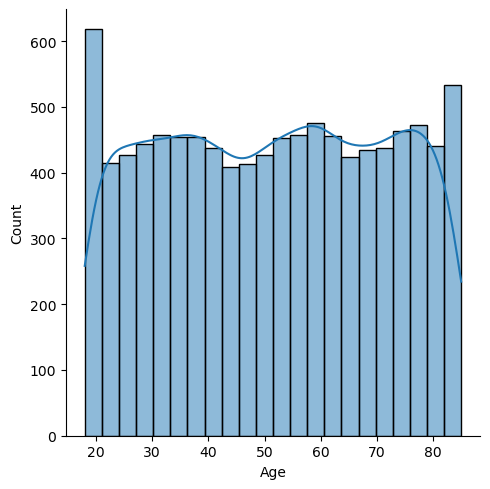

In [229]:
import seaborn as sb
sb.displot(Health['Age'], kde='True', bins='auto')
plt.show()

From the histogram, we can see patients aged around 20 and over 80 have highest count.

### 7. How does the distribution of illnesses look like?  

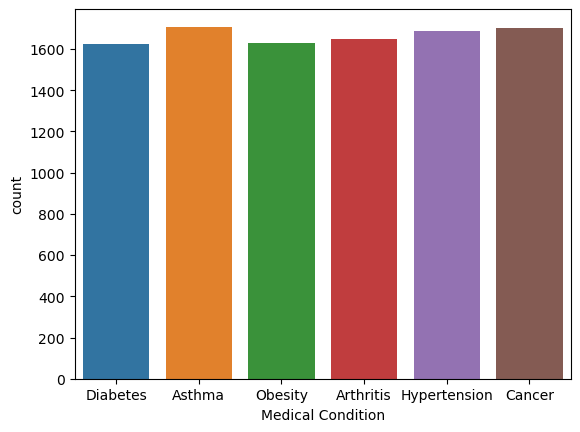

In [227]:
sb.countplot(x='Medical Condition',data=Health)
plt.show()

Although medical condition counts are pretty similar, asthma and cancer occupy the highest two places.

### 8. What was the most prescribed medication?

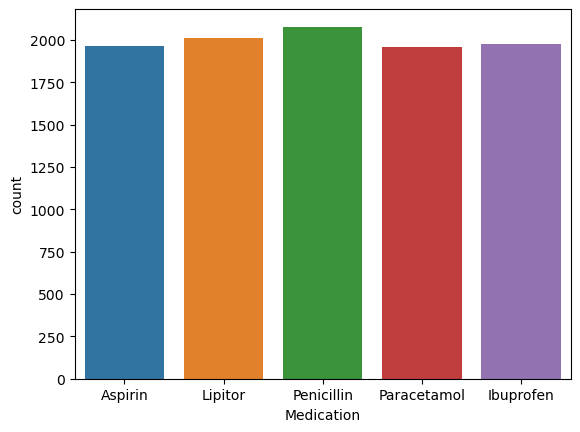

In [228]:
sb.countplot(x='Medication', data=Health)
plt.show()

##  <a id="five">Model Predictions and Accuracy Evaluation</a>

### Feature extraction


In [255]:
#creatin a copy of our cleaned data to work on
df = Health.copy()

In [256]:
#verifyin if copyin was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

In [257]:
#droppin columns unnecessary for our prediction
df.drop('Date of Admission', axis=1, inplace=True)
df.drop('Discharge Date', axis=1, inplace=True)
df.drop('Doctor', axis=1, inplace=True)
df.drop('Hospital', axis=1, inplace=True)
df.drop('Room Number', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)

In [258]:
df.drop('Insurance Provider', axis=1, inplace=True)

In [259]:
#verifyin if deletion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  int64  
 1   Gender             10000 non-null  object 
 2   Blood Type         10000 non-null  object 
 3   Medical Condition  10000 non-null  object 
 4   Billing Amount     10000 non-null  float64
 5   Admission Type     10000 non-null  object 
 6   Medication         10000 non-null  object 
 7   Test Results       10000 non-null  object 
 8   num_days           10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


### Label Encoding

In [260]:
#encoding text fields

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
cols=['Gender', 'Blood Type', 'Medical Condition','Admission Type', 'Medication','Test Results']
for i in cols:
  df[i]=lc.fit_transform(df[i])

In [261]:
df

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,num_days
0,81,0,7,3,37490.983364,0,0,1,14
1,35,1,6,1,47304.064845,1,2,2,14
2,61,1,5,5,36874.896997,1,2,2,30
3,49,1,5,1,23303.322092,2,4,0,1
4,51,1,7,0,18086.344184,2,3,2,24
...,...,...,...,...,...,...,...,...,...
9995,83,1,0,5,39606.840083,0,1,0,4
9996,47,0,2,0,5995.717488,1,1,2,23
9997,54,1,5,0,49559.202905,0,1,2,14
9998,84,1,0,0,25236.344761,2,4,2,20


In [262]:
#separating data into features(x) and target (y)

X=df.drop(['Test Results'],axis=1)
y=df['Test Results']

#seperating our data into test and train

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

#model importation
from sklearn import neighbors, metrics
from sklearn import svm
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)


### XGB Classifier

model1= XGBClassifier()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

xgb_classifier = xgb.XGBClassifier()
xgb_accuracy = cross_val_score(xgb_classifier, X_test, y_test, cv=8).mean()
print("cross validation score: ", xgb_accuracy)

### Support Vector Machine

In [263]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
svm_accuracy = cross_val_score(svm_classifier, X_test, y_test, cv=8).mean()

print("cross validation score: ", svm_accuracy)

cross validation score:  0.3485


In [264]:
y_pred_svm= svm_classifier.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
#print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.3435
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[687   0   0]
 [682   0   0]
 [631   0   0]]
-------------------------------------------------------------------------


### Logistic Regression

In [221]:
model3 = linear_model.LinearRegression()
model3.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model3.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

### Random Forest

In [265]:
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)

RandomForestClassifier()

In [266]:
y_pred_RF = model4.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.3275
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[277 200 210]
 [291 187 204]
 [247 193 191]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.34      0.40      0.37       687
           1       0.32      0.27      0.30       682
           2       0.32      0.30      0.31       631

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.33      0.33      0.33      2000



### Decision Tree

In [267]:
model5 = DecisionTreeClassifier()
model5.fit(X_train,y_train)

DecisionTreeClassifier()

In [268]:
y_pred_DT = model5.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.3245
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[233 225 229]
 [230 213 239]
 [223 205 203]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.34      0.34      0.34       687
           1       0.33      0.31      0.32       682
           2       0.30      0.32      0.31       631

    accuracy                           0.32      2000
   macro avg       0.32      0.32      0.32      2000
weighted avg       0.33      0.32      0.32      2000



### Naive Bayes

In [269]:
from sklearn.naive_bayes import GaussianNB

model6 = GaussianNB()

model6.fit(X_train, y_train);

In [270]:
y_pred_NB = model5.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.3245
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[233 225 229]
 [230 213 239]
 [223 205 203]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.34      0.34      0.34       687
           1       0.33      0.31      0.32       682
           2       0.30      0.32      0.31       631

    accuracy                           0.32      2000
   macro avg       0.32      0.32      0.32      2000
weighted avg       0.33      0.32      0.32      2000



#### Summarily, the following models produced the following accuracies :

- DecisionTree - 0.3175

- Logistic Regression - Classification metrics can't handle a mix of multiclass and continuous targets

- Random Forest - 0.326

- Support vector Machine - 0.3435/0.3485

- Naive Bayes - 0.3245

- XGBClassifier - Still to be tested

Therefore, for our dataset, the most accurate model with respect to this study is the Support Vector Machine model 

In [275]:
y_pred_svm= svm_classifier.predict(X_test)

In [276]:
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])